# load library

In [1]:
source("r/jupyter_common.R")
source("r/identify_cell_types.R")
source("r/plot_sc_clusters.R")


In [2]:
suppressPackageStartupMessages(library(Seurat))
suppressPackageStartupMessages(library(ArchR))

suppressPackageStartupMessages(library(RColorBrewer))
suppressPackageStartupMessages(library(ggplot2))
suppressPackageStartupMessages(library(IRdisplay))


# patameters

In [3]:
cancer_type <- "male-bc"

args <- list()
args$cancer_type <- cancer_type
args$method_to_identify_cell_types <- "singler_blueprint_encode"
args$harmony_theta <- 0

str_column_of_meta_data_harmony <- sprintf("RNA_harmony_th.%s", paste(args$harmony_theta, collapse=","))

str_reduction <- "pca"
str_umap_reduction <- "umap"  
col_cluster_types <- "cluster.type"

if (args$harmony_theta >= 0) {
    str_column_of_meta_data_cluster <- str_column_of_meta_data_harmony
    str_reduction <- "harmony"
    str_umap_reduction <- "umapharmony"
    col_cluster_types <- "cluster.type.harmony"
}

str_condition <- cancer_type

str_condition
str_column_of_meta_data_cluster
str_umap_reduction
col_cluster_types

figure_format <- "pdf"



[1] "male-bc"

[1] "RNA_harmony_th.0"

[1] "umapharmony"

[1] "cluster.type.harmony"

# read scRNA-seq

In [4]:
dir_rna <- "/home/hkim77/francolab.w/sc-rna-seq/male-bc/run-20220725"
fname_rna <- sprintf("%s/output_male-bc/rds_%s/male-bc_sc-rna-seq_merged_seurat_obj.rds",
                     dir_rna, cancer_type)

rna <- readRDS(fname_rna)



## list_sort

In [5]:
list_sort <- sort_cluster_members(rna, args,
                    col_cluster_types = col_cluster_types,
                    str_umap_reduction = str_umap_reduction,
                    f_merge_immune_cell = FALSE)


Sample,NA,Adipocytes,CD4+ T-cells,CD8+ T-cells,Chondrocytes,DCs,Endothelial cells,Epi. Non-tumor,Epi. Tumor,Epi. Unassigned,Fibroblasts,HSC,Macrophages,Mast cells,Mesangial cells,Monocytes,Myocytes,Pericytes,Smooth muscle
<chr>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>
446B7L,7,30,NA,1,1,4,1306,164,1647,1865,502,NA,41,NA,2,4,9,1,NA
4CC61L,13,2,1,4,22,26,2,NA,2648,31,503,1,95,2,1,5,NA,NA,1


Sample,NA,Chondrocytes,HSC,Mesangial cells,Myocytes,Pericytes,Smooth muscle
<chr>,<int>,<int>,<int>,<int>,<int>,<int>,<int>
446B7L,7,1,NA,2,9,1,NA
4CC61L,13,22,1,1,NA,NA,1


Sample,Adipocytes,CD4+ T-cells,CD8+ T-cells,DCs,Endothelial cells,Epi. Non-tumor,Epi. Tumor,Epi. Unassigned,Fibroblasts,Macrophages,Mast cells,Monocytes,Others
<chr>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>
446B7L,30,NA,1,4,1306,164,1647,1865,502,41,NA,4,20
4CC61L,2,1,4,26,2,NA,2648,31,503,95,2,5,38


## nv_colors

In [6]:
nv_colors <- list_sort$nv_color_cluster_type_ordered
names(nv_colors) <- convert_cluster.type(names(nv_colors))
nv_colors


1-Epi. Unassigned   8-Epi. Unassigned        0-Epi. Tumor        2-Epi. Tumor 
          "#A0E989"           "#87CB72"           "#6EAE5C"           "#559145" 
       5-Epi. Tumor        6-Epi. Tumor       4-Fibroblasts 3-Endothelial cells 
          "#3C742F"           "#245719"           "#FABFD2"           "#93CEFF" 
      7-Macrophages 
          "#EEC900"

# nCells

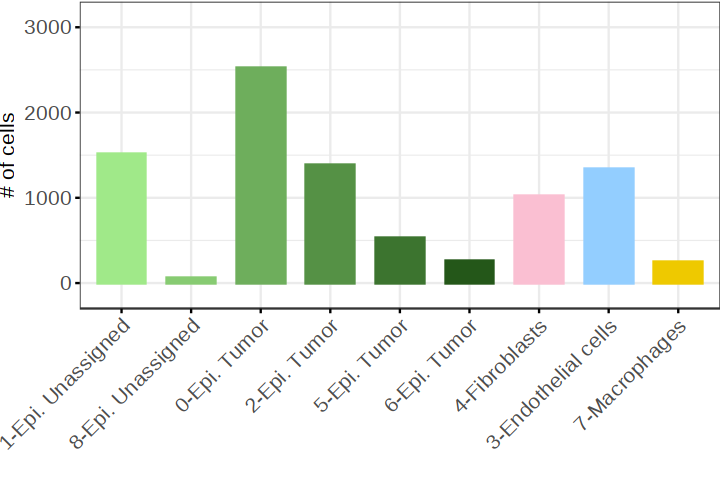

In [7]:
str_title <- "ncells_rna"

gg <- print_ggpubr(rna,
            x = col_cluster_types, y = "cnt",
            color = col_cluster_types,
            fill = col_cluster_types,
            order_x = names(nv_colors),
            facet.by = NULL, facet.ncol = 1,
            plot_type = "barplot",
            color_manual = nv_colors, fill_manual = nv_colors,
            ylimits = c(0, 3000),
            ybreaks = pretty(c(0, 3000), n = 3),
            yexpand = c(0.1, 0.1),
            yintercept = NULL,
            xlim = NULL, ylim = NULL,
            xlab = "", ylab = "# of cells",
            angle = 45, font_size = 12,
            width = 6, height = 4,
            str_condition_plot = sprintf("cluster_type_%s", str_title),
            n_log = 0)



# nCount_RNA

## barplot

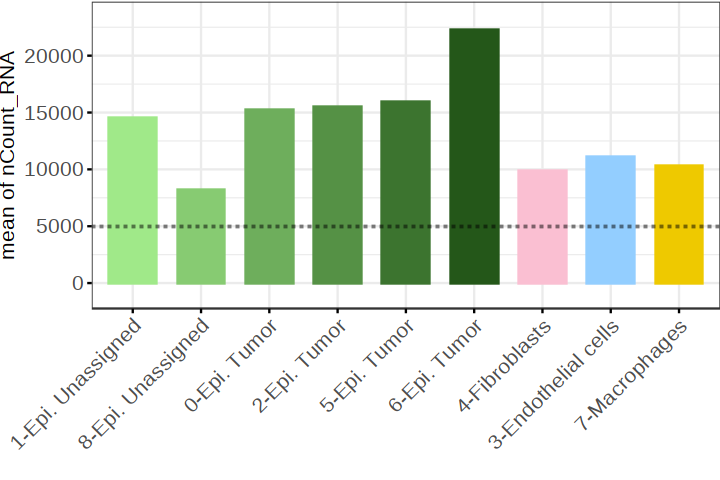

In [8]:
str_title <- "mean_of_ncounts"

gg <- print_ggpubr(rna,
            x = col_cluster_types, y = "nCount_RNA",
            color = col_cluster_types, 
            fill = col_cluster_types, 
            order_x = names(nv_colors),
            facet.by = NULL, facet.ncol = 1,
            plot_type = "barplot",
            color_manual = nv_colors, fill_manual = nv_colors,
            ylimits = c(0, 22500),
            ybreaks = pretty(c(0, 20000), n = 3),
            yexpand = c(0.1, 0.1),
            yintercept = 5000,
            xlim = NULL, ylim = NULL,
            xlab = "", ylab = "mean of nCount_RNA",
            angle = 45, font_size = 12,
            width = 6, height = 4,
            str_condition_plot = sprintf("cluster_type_%s", str_title),
            n_log = 0)


# nFeature_RNA

## barplot

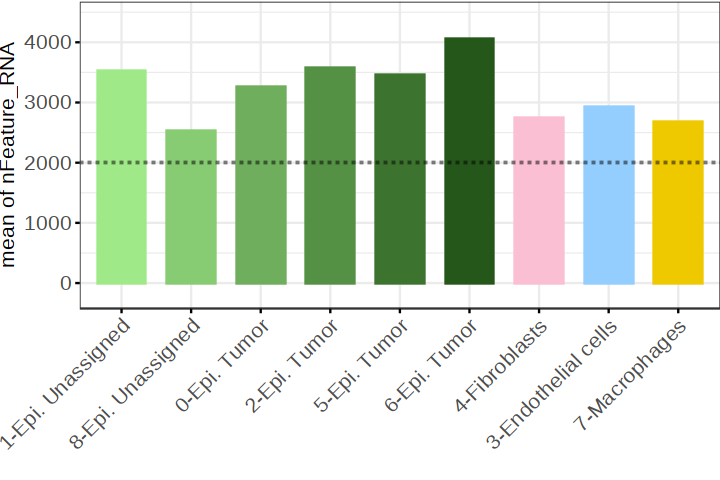

In [9]:
str_title <- "mean_of_nfeatures"

gg <- print_ggpubr(rna,
            x = col_cluster_types, y = "nFeature_RNA",
            color = col_cluster_types, 
            fill = col_cluster_types, 
            order_x = names(nv_colors),
            facet.by = NULL, facet.ncol = 1,
            plot_type = "barplot",
            color_manual = nv_colors, fill_manual = nv_colors,
            ylimits = c(0, 4250),
            ybreaks = pretty(c(0, 4000), n = 3),
            yexpand = c(0.1, 0.1),
            yintercept = 2000,
            xlim = NULL, ylim = NULL,
            xlab = "", ylab = "mean of nFeature_RNA",
            angle = 45, font_size = 12,
            width = 6, height = 4,
            str_condition_plot = sprintf("cluster_type_%s", str_title),
            n_log = 0)




In [10]:
writeLines(capture.output(sessionInfo()), "txt/sessionInfo.txt")



# reference

https://satijalab.org/seurat/

